In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Food_Delivery_Dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           45593 non-null  object 
 1   delivery_person_id           45593 non-null  object 
 2   delivery_person_age          43739 non-null  float64
 3   delivery_person_ratings      43685 non-null  float64
 4   restaurant_latitude          45593 non-null  float64
 5   restaurant_longitude         45593 non-null  float64
 6   delivery_location_latitude   45593 non-null  float64
 7   delivery_location_longitude  45593 non-null  float64
 8   order_date                   45593 non-null  object 
 9   time_orderd                  43862 non-null  object 
 10  time_order_picked            45593 non-null  object 
 11  weather_conditions           44977 non-null  object 
 12  road_traffic_density         44992 non-null  object 
 13  vehicle_conditio

In [4]:
df.sample(5)

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min
21810,0x66fa,PUNERES20DEL01,27.0,4.9,18.592718,73.773572,18.662718,73.843572,02-04-2022,21:50,22:05,Sandstorms,Jam,2,Drinks,motorcycle,0.0,No,Metropolitian,18.0
15789,0xa84d,BANGRES09DEL01,22.0,5.0,12.934179,77.615797,12.974179,77.655797,09-03-2022,12:30,12:45,Sandstorms,High,0,Snack,motorcycle,1.0,No,Metropolitian,26.0
36452,0xcc36,AURGRES05DEL01,39.0,4.8,19.875522,75.367127,19.885522,75.377127,11-02-2022,9:55,9:60,Fog,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,25.0
1018,0xe0f9,DEHRES11DEL01,34.0,4.9,0.000000,0.000000,0.010000,0.010000,15-02-2022,10:30,10:45,Cloudy,Low,0,Meal,motorcycle,1.0,No,Metropolitian,22.0
2336,0x317f,HYDRES08DEL01,31.0,4.9,17.438263,78.397865,17.478263,78.437865,01-04-2022,14:60,15:05,Windy,High,1,Buffet,motorcycle,1.0,No,Urban,28.0


In [5]:
df.isna().sum()

id                                0
delivery_person_id                0
delivery_person_age            1854
delivery_person_ratings        1908
restaurant_latitude               0
restaurant_longitude              0
delivery_location_latitude        0
delivery_location_longitude       0
order_date                        0
time_orderd                    1731
time_order_picked                 0
weather_conditions              616
road_traffic_density            601
vehicle_condition                 0
type_of_order                     0
type_of_vehicle                   0
multiple_deliveries             993
festival                        228
city                           1200
time_taken_min                    0
dtype: int64

In [6]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['id', 'delivery_person_id', 'weather_conditions', 'road_traffic_density', 'type_of_order', 'type_of_vehicle', 'festival', 'city']
nums = ['delivery_person_age', 'delivery_person_ratings', 'vehicle_condition', 'multiple_deliveries', 'time_taken_min']
timestamp = ['order_date', 'time_orderd', 'time_order_picked']
geoloc = ['restaurant_latitude', 'restaurant_longitude', 'delivery_location_latitude', 'delivery_location_longitude']

In [7]:
# ringkasan statistik dari kolom numerik
df[nums].describe()

,delivery_person_age,delivery_person_ratings,vehicle_condition,multiple_deliveries,time_taken_min
count,43739.000000,43685.000000,45593.000000,44600.000000,45593.000000
mean,29.567137,4.633780,1.023359,0.744664,26.294607
std,5.815155,0.334716,0.839065,0.572473,9.383806
min,15.000000,1.000000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,1.000000,1.000000,26.000000
75%,35.000000,4.900000,2.000000,1.000000,32.000000
max,50.000000,6.000000,3.000000,3.000000,54.000000


In [8]:
# categorical columns 
df[cats].describe()

,id,delivery_person_id,weather_conditions,road_traffic_density,type_of_order,type_of_vehicle,festival,city
count,45593,45593,44977,44992,45593,45593,45365,44393
unique,45593,1320,6,4,4,4,2,3
top,0x6b1a,JAPRES11DEL02,Fog,Low,Snack,motorcycle,No,Metropolitian
freq,1,67,7654,15477,11533,26435,44469,34093


In [9]:
# karena sedikit, dapat kita drop
#df.dropna(inplace=True, subset=['festival'])
df.dropna(inplace=True, subset=['festival'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45365 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           45365 non-null  object 
 1   delivery_person_id           45365 non-null  object 
 2   delivery_person_age          43521 non-null  float64
 3   delivery_person_ratings      43468 non-null  float64
 4   restaurant_latitude          45365 non-null  float64
 5   restaurant_longitude         45365 non-null  float64
 6   delivery_location_latitude   45365 non-null  float64
 7   delivery_location_longitude  45365 non-null  float64
 8   order_date                   45365 non-null  object 
 9   time_orderd                  43643 non-null  object 
 10  time_order_picked            45365 non-null  object 
 11  weather_conditions           44752 non-null  object 
 12  road_traffic_density         44767 non-null  object 
 13  vehicle_conditio

In [11]:
# imputasi kolom kategorikal dengan nilai yang paling sering muncul
df['delivery_person_ratings'].fillna(df['delivery_person_ratings'].mode()[0], inplace=True)
df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0], inplace=True)
df['weather_conditions'].fillna(df['weather_conditions'].mode()[0], inplace=True)
df['city'].fillna(df['city'].mode()[0], inplace=True)
df['time_orderd'].fillna(df['time_orderd'].mode()[0], inplace=True)
df['road_traffic_density'].fillna(df['road_traffic_density'].mode()[0], inplace=True)

In [12]:
# imputasi kolom numerikal dengan nilai rata-rata
df['delivery_person_age'].fillna(df['delivery_person_age'].mean(), inplace=True)

In [13]:
# cek jumlah duplicated rows
# dari semua kolom
df.duplicated().sum()

0

In [14]:
df.duplicated(subset=['delivery_person_id']).sum()

44045

In [15]:
from scipy import stats

In [16]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['delivery_person_age',	'delivery_person_ratings']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 45365
Jumlah baris setelah memfilter outlier: 44595


In [17]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['delivery_person_age',	'delivery_person_ratings']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 44595
Jumlah baris setelah memfilter outlier: 40020


<Axes: xlabel='delivery_person_age', ylabel='Density'>

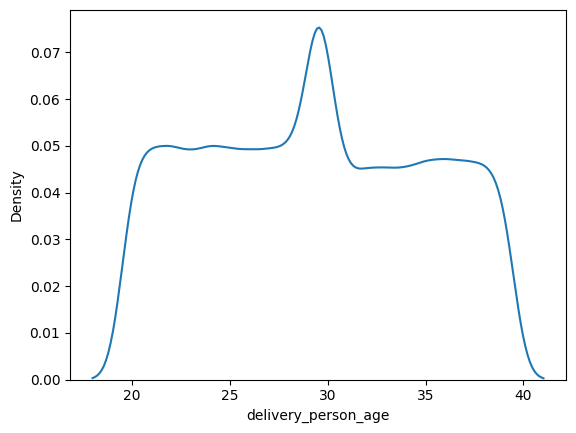

In [18]:
# distribusi gaji (nilai asli)
sns.kdeplot(df['delivery_person_age'])

<Axes: xlabel='delivery_person_age', ylabel='Density'>

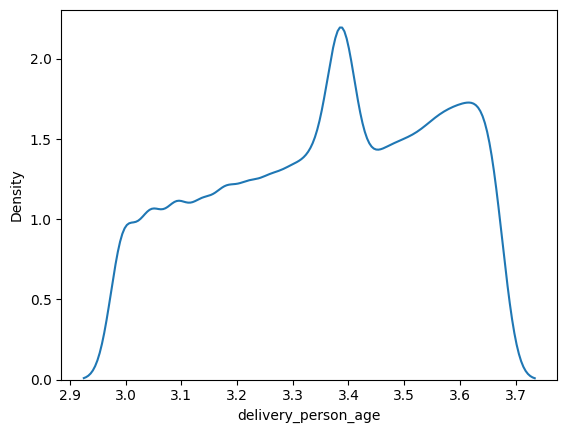

In [19]:
# distribusi gaji (setelah log transformation)
sns.kdeplot(np.log(df['delivery_person_age']))
# lebih mendekati distribusi normal!

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [23]:
# berat dan tinggi kita re-scale
df['delivery_person_age_norm'] = MinMaxScaler().fit_transform(df['delivery_person_age'].values.reshape(len(df), 1))

# umur dan log gaji kita standarisasi (karena distribusi datanya sudah mendekati normal)
df['delivery_person_age_std'] = StandardScaler().fit_transform(df['delivery_person_age'].values.reshape(len(df), 1))

In [ ]:
df[['delivery_person_age','delivery_person_age_std','delivery_person_age_norm']].describe()

In [ ]:
# label encoder pada road_traffic_density, city dan weather_conditions
df['weather_conditions'] = df['weather_conditions'].astype('category').cat.codes
df['road_traffic_density'] = df['road_traffic_density'].astype('category').cat.codes
df['city'] = df['city'].astype('category').cat.codes
df['festival'] = df['festival'].astype('category').cat.codes

In [ ]:
# type_of_order	type_of_vehicle
for cat in ['type_of_order','type_of_vehicle']:
  onehots = pd.get_dummies(df[cat], prefix=cat)
  df = df.join(onehots)

In [ ]:
df.info()

In [ ]:
# drop kolom kategori yang asli (karena sudah di-encoding)
df_new = df.drop(columns=['type_of_order','type_of_vehicle']).copy()

In [ ]:
df_new.info()

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_new.corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
drop_columns = ['id', 'delivery_person_id', 'time_taken_min','type_of_vehicle_scooter','delivery_person_age', 'delivery_person_age_norm'] + geoloc + timestamp

In [ ]:
# pemisahan features vs target
X = df_new.drop(drop_columns, axis=1)
y = df_new['time_taken_min'].values

In [ ]:
X.info()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)